In [1]:
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Set start and end dates
start = datetime.datetime(2022, 1, 1)
end = datetime.datetime.now()

# Fetch the data from FRED
balance_sheet = web.DataReader("WALCL", "fred", start, end)

# Print the last 5 rows of the data
print(balance_sheet.tail())

                WALCL
DATE                 
2023-02-15  8384767.0
2023-02-22  8382190.0
2023-03-01  8339684.0
2023-03-08  8342283.0
2023-03-15  8639300.0


<Axes: title={'center': 'Federal Reserve Balance Sheet'}, xlabel='DATE'>

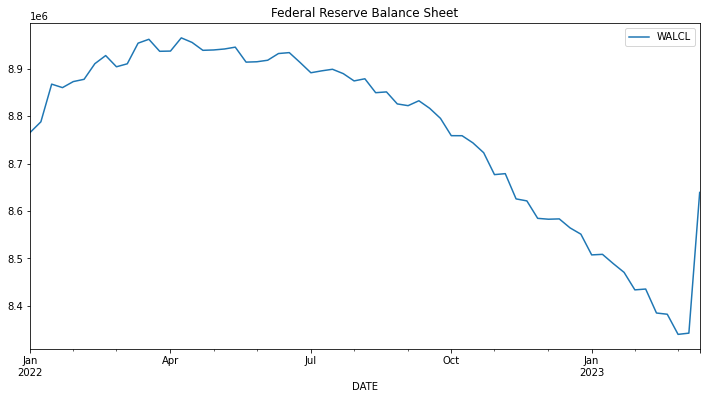

In [2]:
# Plot the data
balance_sheet.plot(title="Federal Reserve Balance Sheet", figsize=(12,8))

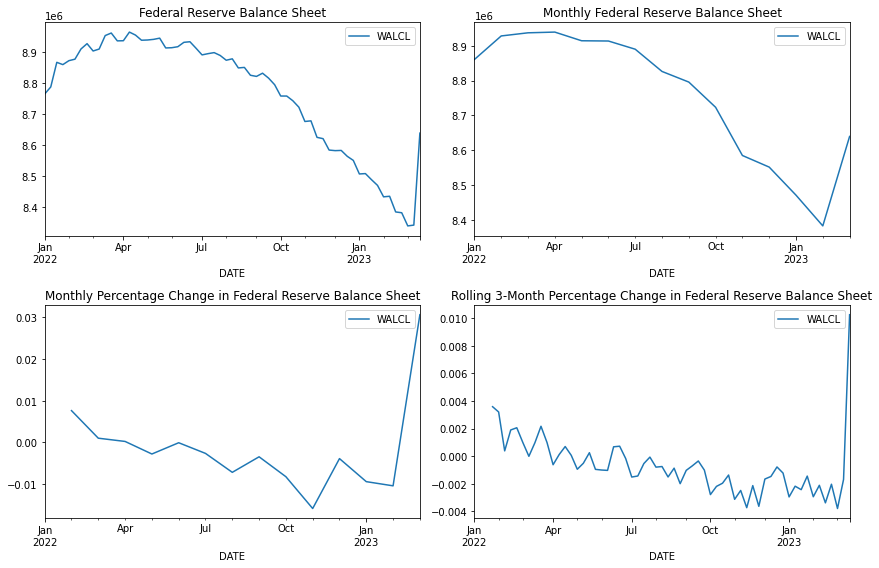

In [3]:
# Calculate the monthly percentage change in the balance sheet
balance_sheet_monthly = balance_sheet.resample('M').last()
balance_sheet_monthly_pct_change = balance_sheet_monthly.pct_change()

# Calculate the rolling 3-month percentage change in the balance sheet
balance_sheet_rolling = balance_sheet.rolling(window=3).sum()
balance_sheet_rolling_pct_change = balance_sheet_rolling.pct_change()

# Plot the data
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

balance_sheet.plot(ax=axes[0,0], title="Federal Reserve Balance Sheet")
balance_sheet_monthly.plot(ax=axes[0,1], title="Monthly Federal Reserve Balance Sheet")
balance_sheet_monthly_pct_change.plot(ax=axes[1,0], title="Monthly Percentage Change in Federal Reserve Balance Sheet")
balance_sheet_rolling_pct_change.plot(ax=axes[1,1], title="Rolling 3-Month Percentage Change in Federal Reserve Balance Sheet")

plt.tight_layout()
plt.show()